## Base Configurations

In [645]:
import pymongo
import pandas as pd
from pymongo import MongoClient
from random import random
import json

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

## Read Data

In [646]:
import pandas as pd
import pymongo

# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")

# Database Name
db = client["load_data"]

# Collection Name
col = db["individual_collection"]


cursor = col.find()


data = list(cursor)


df_individual = pd.DataFrame(data)


col = db["household_collection"]


cursor = col.find()


data = list(cursor)
df_household=pd.DataFrame(data)


In [647]:
df_individual

,_id,hid,idno,relation,sex,age,age_month,marstat,religion,school_attend,...,disability,blind,deaf,mental,ch_weight,ch_height,children_born,children_surv,births_12m,hhweight
0,6595805e57253da081f9bf3b,00a191396a2,1,1,1,31,,1,6,1,...,0,0,0,0,,,,,,322.9722008679479
1,6595805e57253da081f9bf3c,0111c7fa67c,1,1,2,54,,2,6,2,...,0,0,0,0,,,1,1,0,322.9722008679479
2,6595805e57253da081f9bf3d,01410d9c60d,1,1,1,32,,2,6,1,...,0,0,0,0,,,,,,256.1922345230715
3,6595805e57253da081f9bf3e,01410d9c60d,2,4,2,55,,4,6,4,...,0,0,0,0,,,,,,256.1922345230715
4,6595805e57253da081f9bf3f,015ff82b55c,1,1,1,54,,2,7,4,...,0,0,0,0,,,,,,268.3340465857763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32391,6595805e57253da081fa3dc2,eba931cf345,5,4,1,17,,1,6,4,...,0,0,0,0,,,,,,178.67129389312973
32392,6595805e57253da081fa3dc3,f927f4e982d,1,1,1,66,,2,6,3,...,1,1,1,0,,,,,,364.28740839694643
32393,6595805e57253da081fa3dc4,f927f4e982d,2,2,2,55,,2,6,3,...,0,0,0,0,,,3,3,0,364.28740839694643
32394,6595805e57253da081fa3dc5,f927f4e982d,3,5,2,81,,4,6,2,...,0,0,0,0,,,10,9,0,364.28740839694643


In [648]:
df_household

,_id,hid,geo1,geo2,ea,urbrur,hhsize,statocc,rooms,bedrooms,...,exp_12,tot_exp,tot_food,share_food,pc_exp,quint_nat,quint_urb,quint_rur,hhweight,popweight
0,6595805f57253da081fa3dc8,00a191396a2,1,11,11066,2,1,1,1,1,...,326,5044,1279,0.2540000081062317,5044.0,5,4,,322.9722008679479,322.9722008679479
1,6595805f57253da081fa3dc9,0111c7fa67c,1,11,11066,2,1,2,1,0,...,234,4652,1755,0.37700000405311584,4652.0,5,4,,322.9722008679479,322.9722008679479
2,6595805f57253da081fa3dca,01410d9c60d,1,11,11087,2,2,1,4,1,...,836,9957,1722,0.17299999296665192,4978.5,5,4,,256.1922345230715,512.384469046143
3,6595805f57253da081fa3dcb,015ff82b55c,1,11,11094,2,2,1,1,1,...,928,11533,3700,0.32100000977516174,5766.5,5,5,,268.3340465857763,536.6680931715526
4,6595805f57253da081fa3dcc,01c39d3df0d,1,11,11094,2,1,2,3,2,...,689,14549,1492,0.10300000011920929,14549.0,5,5,,268.3340465857763,268.3340465857763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,6595805f57253da081fa5d03,dbeabfbf152,10,109,109046,2,4,2,2,1,...,434,8883,3778,0.42500001192092896,2220.75,3,2,,178.67129389312973,714.6851755725189
7996,6595805f57253da081fa5d04,e31748e1596,10,109,109040,2,2,1,5,2,...,465,7211,1790,0.24799999594688416,3605.5,4,3,,364.28740839694643,728.5748167938929
7997,6595805f57253da081fa5d05,eba931cf345,10,109,109046,2,5,1,4,3,...,1148,14983,3615,0.2409999966621399,2996.60009765625,4,3,,178.67129389312973,893.3564694656486
7998,6595805f57253da081fa5d06,f927f4e982d,10,109,109040,2,3,1,4,1,...,611,12438,3350,0.26899999380111694,4146.0,4,4,,364.28740839694643,1092.8622251908394


In [649]:
numeric_columns=df_individual.columns[2:]
numeric_columns2=df_household.columns[2:]

In [650]:
df_individual[numeric_columns] = df_individual[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_household[numeric_columns2] = df_household[numeric_columns2].apply(pd.to_numeric, errors='coerce')

In [651]:
df_individual.describe()

,idno,relation,sex,age,age_month,marstat,religion,school_attend,educ_attain,yrs_school,...,disability,blind,deaf,mental,ch_weight,ch_height,children_born,children_surv,births_12m,hhweight
count,32396.000000,32396.000000,32396.000000,32396.000000,3165.000000,32396.000000,32396.000000,32396.000000,32396.000000,29854.000000,...,32396.000000,32396.000000,32396.000000,32396.000000,3165.000000,3165.000000,11623.000000,7715.000000,11320.000000,32396.000000
mean,3.087511,2.474225,1.505309,28.136190,30.359558,1.591987,5.772565,2.404741,1.460828,4.637134,...,0.039110,0.026238,0.008767,0.007810,11.933210,86.185972,2.293728,3.114712,0.047968,310.975034
std,2.047521,1.029515,0.499980,20.137273,17.293287,0.721442,1.063478,1.151001,0.892722,4.942147,...,0.193859,0.159844,0.093220,0.088028,2.898169,12.650298,2.669148,2.194210,0.214534,70.741693
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.770000,48.400000,0.000000,0.000000,0.000000,156.667553
25%,2.000000,2.000000,1.000000,12.000000,15.000000,1.000000,6.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.760000,77.700000,0.000000,1.000000,0.000000,264.084412
50%,3.000000,3.000000,2.000000,24.000000,31.000000,1.000000,6.000000,3.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,12.340000,89.500000,2.000000,2.000000,0.000000,302.684327
75%,4.000000,3.000000,2.000000,42.000000,45.000000,2.000000,6.000000,3.000000,2.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,14.380000,96.400000,3.000000,4.000000,0.000000,350.174292
max,22.000000,5.000000,2.000000,100.000000,59.000000,4.000000,7.000000,4.000000,4.000000,18.000000,...,1.000000,1.000000,1.000000,1.000000,18.590000,108.800000,18.000000,15.000000,2.000000,552.230851


In [652]:
df_household.describe()

,geo1,geo2,ea,urbrur,hhsize,statocc,rooms,bedrooms,floor,walls,...,exp_12,tot_exp,tot_food,share_food,pc_exp,quint_nat,quint_urb,quint_rur,hhweight,popweight
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,4450.000000,3550.000000,8000.000000,8000.000000
mean,5.181250,55.675000,55737.375000,1.556250,4.049500,1.325625,2.812750,1.682250,2.413000,3.324500,...,706.642250,12077.152000,3774.062125,0.364376,3665.114230,3.385250,3.375506,3.381408,312.719375,1259.293399
std,3.034106,30.726615,30722.827585,0.496857,2.135034,0.646255,1.650614,0.892824,1.671161,1.169346,...,545.641374,7381.022408,1742.040421,0.166257,2863.957576,1.376161,1.380232,1.395316,71.368811,720.500971
min,1.000000,11.000000,11003.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,10.000000,1421.000000,409.000000,0.079000,528.625000,1.000000,1.000000,1.000000,156.667553,163.528826
25%,3.000000,31.000000,31071.750000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,3.000000,...,273.000000,7044.000000,2611.000000,0.240000,1869.416656,2.000000,2.000000,2.000000,264.440209,763.921692
50%,5.000000,51.500000,51511.500000,2.000000,4.000000,1.000000,3.000000,2.000000,2.000000,3.000000,...,636.000000,10308.000000,3508.500000,0.319000,2799.812500,4.000000,4.000000,4.000000,304.433699,1138.778763
75%,8.000000,83.000000,83095.250000,2.000000,5.000000,1.000000,4.000000,2.000000,2.000000,3.000000,...,980.000000,14848.000000,4664.000000,0.480000,4519.625000,5.000000,5.000000,5.000000,354.353590,1599.726424
max,10.000000,109.000000,109046.000000,2.000000,22.000000,3.000000,20.000000,13.000000,6.000000,8.000000,...,6765.000000,76247.000000,18397.000000,0.828000,34938.500000,5.000000,5.000000,5.000000,552.230851,5931.223799


## Exploratory Data Analysis

You can analyze following steps; 

* Identify Categorical and Numerical Columns
* Calculate Basic Statistics(mean, standard deviation, minimum, and maximum values)
* Examine Missing Data
* Examine Categoric and Numeric Variables
* Data Visualization
* Correlation Analysis
* Identifiying Outliers



## Target Analysis

* Rural (1): There are 3550 instances classified as rural.
* Urban (2): There are 4450 instances classified as urban.

And also you can find most correlated features with your target.

In [653]:
corr=df_household.corr()["urbrur"].sort_values(ascending=False)

C:\Users\Bora\AppData\Local\Temp\ipykernel_7888\3061306534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_household.corr()["urbrur"].sort_values(ascending=False)


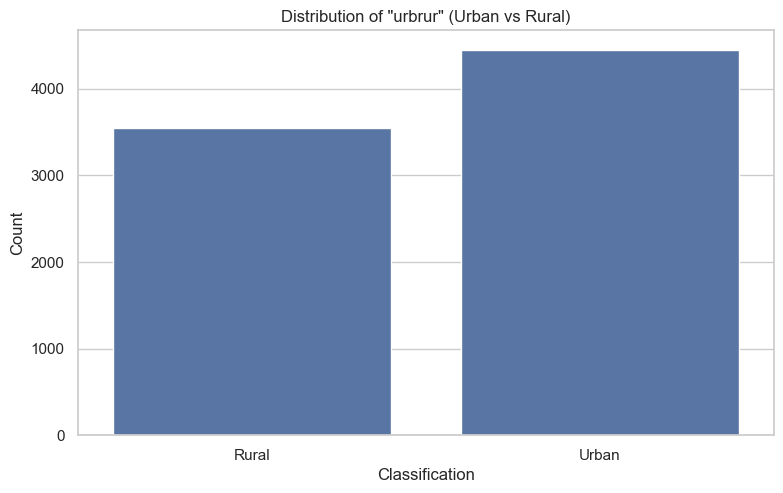

2    4450
1    3550
Name: urbrur, dtype: int64

In [654]:
# Analyzing and visualizing 'urbrur' column

# 1=Rural ,  Urban=2

# Counting the frequency of each category in 'urbrur'
urbrur_counts = df_household['urbrur'].value_counts()

# Visualizing the counts
plt.figure(figsize=(8, 5))
sns.barplot(x=urbrur_counts.index, y=urbrur_counts.values)
plt.title('Distribution of "urbrur" (Urban vs Rural)')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Rural', 'Urban'])  
plt.show()

urbrur_counts

## Feature Extraction

We are expecting you to prepare new variables from the Individual dataset. You can combine these 2 datasets via 'hid' columns. First of all, the Individual dataset contains the characteristics of individuals within each family. After deduplicating(or aggregation) these features based on the 'hid' column, that is, after creating new variables, we expect you to add them to the Household dataset as new feature columns. Examples are given to you below. You may increase the number of features extracted.

Note: Since you will be generating new variables from Individual dataset, you can perform similar data exploratory analyzes within this dataset.

Please remember, it's important for us to to analyze and interpret new variables to understand dataset.

In [655]:
df_individual.head()

,_id,hid,idno,relation,sex,age,age_month,marstat,religion,school_attend,...,disability,blind,deaf,mental,ch_weight,ch_height,children_born,children_surv,births_12m,hhweight
0,6595805e57253da081f9bf3b,00a191396a2,1,1,1,31,NaN,1,6,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,322.972201
1,6595805e57253da081f9bf3c,0111c7fa67c,1,1,2,54,NaN,2,6,2,...,0,0,0,0,NaN,NaN,1.0,1.0,0.0,322.972201
2,6595805e57253da081f9bf3d,01410d9c60d,1,1,1,32,NaN,2,6,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,256.192235
3,6595805e57253da081f9bf3e,01410d9c60d,2,4,2,55,NaN,4,6,4,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,256.192235
4,6595805e57253da081f9bf3f,015ff82b55c,1,1,1,54,NaN,2,7,4,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,268.334047


* Average Age of Household Members (Ortalama Hanehalkı Yaşı): The mean age of individuals within each household.
* Average Educational Attainment (Ortalama Eğitim Seviyesi): The mean educational attainment level of household members.
* Number of Individuals with Disabilities (Engelli Birey Sayısı): The count of household members with disabilities.
* Average Births in Last 12 Months (Son 12 Ayda Ortalama Doğum Sayısı): The mean number of births in the last 12 months per household.
* Household Religious Diversity (Hanehalkı Dini Çeşitliliği): A measure of the diversity of religious affiliations within each household.

In [656]:
data=df_individual
data["urbrur"]=df_household["urbrur"]
data.corr()["urbrur"].sort_values(ascending=False)

C:\Users\Bora\AppData\Local\Temp\ipykernel_7888\1546306272.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["urbrur"].sort_values(ascending=False)


urbrur            1.000000
children_surv     0.054890
labor_force       0.041525
age               0.038813
industry          0.038577
deaf              0.027174
religion          0.026205
educ_attain       0.023709
yrs_school        0.023326
hhweight          0.023051
children_born     0.020382
school_attend     0.016650
marstat           0.014610
act_status        0.014456
disability        0.006256
mental            0.005167
occupation        0.002926
blind            -0.000579
ch_weight        -0.004563
ch_height        -0.007506
migrate_recent   -0.011454
literacy         -0.014987
age_month        -0.017783
births_12m       -0.018497
sex              -0.020747
relation         -0.021908
idno             -0.024581
Name: urbrur, dtype: float64

In [657]:
# Aggregating data to create new variables at the household level

# Grouping by 'hid'
grouped_data = df_individual.groupby('hid')

# Creating the new variables
new_variables = {
    'Average Age': grouped_data['age'].mean(),
    'Average Education Level': grouped_data['educ_attain'].mean(),
    'Number of Disabled Individuals': grouped_data['disability'].sum(),
    'Average Births Last 12 Months': grouped_data['births_12m'].mean(),
    'Religious Diversity': grouped_data['religion'].nunique(),
    'Labor Force':grouped_data["labor_force"].mean(),
    'Industry':grouped_data["industry"].mean(),
    'Years School':grouped_data["yrs_school"].mean()
    

}

# Converting the new variables into a DataFrame
new_variables_df = pd.DataFrame(new_variables)

# Displaying the first few rows of the new variables
new_variables_df.reset_index(inplace = True)
new_variables_df

,hid,Average Age,Average Education Level,Number of Disabled Individuals,Average Births Last 12 Months,Religious Diversity,Labor Force,Industry,Years School
0,00076fe9d44,19.000000,0.800000,1,0.0,1,0.600000,0.200000,1.750000
1,001732acf20,50.000000,0.000000,0,NaN,1,1.000000,13.000000,NaN
2,0025c7eb6b0,27.000000,2.333333,0,0.0,1,2.000000,0.000000,10.333333
3,0025c83c02c,18.250000,0.750000,0,0.0,1,0.750000,1.500000,2.000000
4,002a356ac9f,24.800000,1.600000,1,0.0,1,0.800000,1.600000,5.200000
...,...,...,...,...,...,...,...,...,...
7995,ffdf35cd744,22.333333,0.666667,0,0.0,1,1.000000,0.000000,1.500000
7996,ffdfe160ab5,32.888889,1.000000,0,0.0,1,1.222222,0.555556,1.125000
7997,ffe1892f851,15.875000,1.375000,0,0.5,1,0.625000,0.125000,5.142857
7998,fff47529494,16.000000,1.500000,0,0.0,1,0.750000,0.750000,9.666667


In [658]:
model_data = pd.merge(df_household, new_variables_df, on = 'hid', how = 'left')
model_data

,_id,hid,geo1,geo2,ea,urbrur,hhsize,statocc,rooms,bedrooms,...,hhweight,popweight,Average Age,Average Education Level,Number of Disabled Individuals,Average Births Last 12 Months,Religious Diversity,Labor Force,Industry,Years School
0,6595805f57253da081fa3dc8,00a191396a2,1,11,11066,2,1,1,1,1,...,322.972201,322.972201,31.000000,3.000000,0,NaN,1,1.00,5.00,15.0
1,6595805f57253da081fa3dc9,0111c7fa67c,1,11,11066,2,1,2,1,0,...,322.972201,322.972201,54.000000,1.000000,0,0.0,1,2.00,0.00,0.0
2,6595805f57253da081fa3dca,01410d9c60d,1,11,11087,2,2,1,4,1,...,256.192235,512.384469,43.500000,2.000000,0,NaN,1,1.50,5.50,7.5
3,6595805f57253da081fa3dcb,015ff82b55c,1,11,11094,2,2,1,1,1,...,268.334047,536.668093,50.000000,1.000000,0,0.0,2,1.00,4.50,0.0
4,6595805f57253da081fa3dcc,01c39d3df0d,1,11,11094,2,1,2,3,2,...,268.334047,268.334047,41.000000,3.000000,0,NaN,1,1.00,0.00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,6595805f57253da081fa5d03,dbeabfbf152,10,109,109046,2,4,2,2,1,...,178.671294,714.685176,19.500000,1.000000,0,0.0,1,0.75,0.25,3.0
7996,6595805f57253da081fa5d04,e31748e1596,10,109,109040,2,2,1,5,2,...,364.287408,728.574817,40.000000,3.000000,1,0.0,1,1.00,9.50,12.0
7997,6595805f57253da081fa5d05,eba931cf345,10,109,109046,2,5,1,4,3,...,178.671294,893.356469,36.600000,1.200000,0,0.0,1,1.20,4.60,1.8
7998,6595805f57253da081fa5d06,f927f4e982d,10,109,109040,2,3,1,4,1,...,364.287408,1092.862225,67.333333,1.333333,1,0.0,1,2.00,0.00,3.0


## Modeling & Model Performances

Data Preprocessing Steps; 
 * Remove ID and Geo Columns 
 * Handle missing values etc.
 * Handle categoric variables etc.
 * Handle numeric variables etc.
 * Split Train/Test (70/30)
 
Model Selection
 * Since it's a classification problem you can use several classification algorithms such as  Random Forest, and Gradient Boosting etc. And compare their performances.
 
Model Training and Evaluation
 * Train each model on the training set. Evaluate their performance using metrics like accuracy, precision, recall, and F1-score. Create a confusion matrix for each model.



Please remember, it's important for us to add your comments about each model performances.

### 1) Modeling

In [659]:
# Change target column definitian for a binary classification problems

# 1=Rural ,  Urban=2

model_data['urbrur'] = model_data['urbrur'].replace({2:0 , 1:1})
model_data

,_id,hid,geo1,geo2,ea,urbrur,hhsize,statocc,rooms,bedrooms,...,hhweight,popweight,Average Age,Average Education Level,Number of Disabled Individuals,Average Births Last 12 Months,Religious Diversity,Labor Force,Industry,Years School
0,6595805f57253da081fa3dc8,00a191396a2,1,11,11066,0,1,1,1,1,...,322.972201,322.972201,31.000000,3.000000,0,NaN,1,1.00,5.00,15.0
1,6595805f57253da081fa3dc9,0111c7fa67c,1,11,11066,0,1,2,1,0,...,322.972201,322.972201,54.000000,1.000000,0,0.0,1,2.00,0.00,0.0
2,6595805f57253da081fa3dca,01410d9c60d,1,11,11087,0,2,1,4,1,...,256.192235,512.384469,43.500000,2.000000,0,NaN,1,1.50,5.50,7.5
3,6595805f57253da081fa3dcb,015ff82b55c,1,11,11094,0,2,1,1,1,...,268.334047,536.668093,50.000000,1.000000,0,0.0,2,1.00,4.50,0.0
4,6595805f57253da081fa3dcc,01c39d3df0d,1,11,11094,0,1,2,3,2,...,268.334047,268.334047,41.000000,3.000000,0,NaN,1,1.00,0.00,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,6595805f57253da081fa5d03,dbeabfbf152,10,109,109046,0,4,2,2,1,...,178.671294,714.685176,19.500000,1.000000,0,0.0,1,0.75,0.25,3.0
7996,6595805f57253da081fa5d04,e31748e1596,10,109,109040,0,2,1,5,2,...,364.287408,728.574817,40.000000,3.000000,1,0.0,1,1.00,9.50,12.0
7997,6595805f57253da081fa5d05,eba931cf345,10,109,109046,0,5,1,4,3,...,178.671294,893.356469,36.600000,1.200000,0,0.0,1,1.20,4.60,1.8
7998,6595805f57253da081fa5d06,f927f4e982d,10,109,109040,0,3,1,4,1,...,364.287408,1092.862225,67.333333,1.333333,1,0.0,1,2.00,0.00,3.0


In [660]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

In [661]:
numerical_columns = model_data.select_dtypes(include=['int64']).columns
categoric=[]
for col in numerical_columns:
    print(model_data[col].nunique(),col)
    if(model_data[col].nunique()<800):
        categoric.append(col)


10 geo1
59 geo2
320 ea
2 urbrur
19 hhsize
3 statocc
19 rooms
10 bedrooms
5 floor
8 walls
9 roof
15 water
4 piped_water
9 toilet
3 flush_toilet
2 electricity
6 cook_fuel
2 phone
2 cell
2 car
2 bicycle
2 motorcycle
2 refrigerator
2 tv
2 radio
2 bank
4378 exp_01
459 exp_02
1669 exp_03
4510 exp_04
1641 exp_05
1012 exp_06
2708 exp_07
1697 exp_08
1228 exp_09
1873 exp_10
1194 exp_11
1852 exp_12
6299 tot_exp
4378 tot_food
5 quint_nat
6 Number of Disabled Individuals
3 Religious Diversity


In [662]:
categoric

['geo1',
 'geo2',
 'ea',
 'urbrur',
 'hhsize',
 'statocc',
 'rooms',
 'bedrooms',
 'floor',
 'walls',
 'roof',
 'water',
 'piped_water',
 'toilet',
 'flush_toilet',
 'electricity',
 'cook_fuel',
 'phone',
 'cell',
 'car',
 'bicycle',
 'motorcycle',
 'refrigerator',
 'tv',
 'radio',
 'bank',
 'exp_02',
 'quint_nat',
 'Number of Disabled Individuals',
 'Religious Diversity']

In [663]:
values_to_remove = ['hhsize', 'exp_02', 'quint_nat', 'Number of Disabled Individuals']
categoric = [item for item in categoric if item not in values_to_remove]


In [682]:
from sklearn.preprocessing import LabelEncoder
data = model_data

# Removing the ID and geo columns 
# Since quint_rur and quint_urb columns are too correlated with our target we did also remove these features
data=data.drop(['_id','hid','geo1','geo2', 'quint_rur','quint_urb'], axis=1) 


# If we had not removed these two features(quint_rur, quint_urb), what would have encountered in the model results? 
#Model would be overfitted.

# Identifying categorical and numerical columns
values_to_remove = ['hhsize', 'exp_02', 'quint_nat', 'Number of Disabled Individuals','geo1','geo2']
categoric = [item for item in categoric if item not in values_to_remove]
numeric = [item for item in data.columns if item not in categoric]


# Handling missing values for numerical columns
data=data.fillna(0)
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categoric:
    data[column] = label_encoder.fit_transform(data[column])
 
# Handling numerical variables

def detect_outliers_iqr(data_column):
    q1 = np.percentile(data_column, 25)
    q3 = np.percentile(data_column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (data_column < lower_bound) | (data_column > upper_bound)
    return outliers

# DataFrame'deki her bir sayısal sütun için aykırı değerleri belirleme
outliers_dict = {}
for column in data.select_dtypes(include=np.number).columns:
    outliers_dict[column] = detect_outliers_iqr(data[column])

# Aykırı değerleri içeren DataFrame'i oluşturma
outliers_df = pd.DataFrame(outliers_dict, index=data.index)

# Aykırı değerleri gösterme
print("Aykırı Değerler:")
data[outliers_df]



Aykırı Değerler:


,ea,urbrur,hhsize,statocc,rooms,bedrooms,floor,walls,roof,water,...,hhweight,popweight,Average Age,Average Education Level,Number of Disabled Individuals,Average Births Last 12 Months,Religious Diversity,Labor Force,Industry,Years School
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,9.5,NaN
7997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,67.333333,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [665]:
df_features1.head(20)["Variable"].values

array(['cook_fuel', 'share_food', 'ea', 'exp_04', 'exp_08', 'water',
       'exp_12', 'exp_06', 'toilet', 'Industry', 'exp_09', 'piped_water',
       'exp_11', 'hhweight', 'exp_07', 'exp_10', 'popweight', 'exp_05',
       'pc_exp', 'tot_food'], dtype=object)

In [666]:
# Training the Model1 Classifier
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [667]:
# Training the Model2 Classifier
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)


### 2) Model Performances

 ### 2.1) Model 1

Accuracy: 0.9017
Precision: 0.9017
Recall: 0.9017
F1 Score: 0.9015


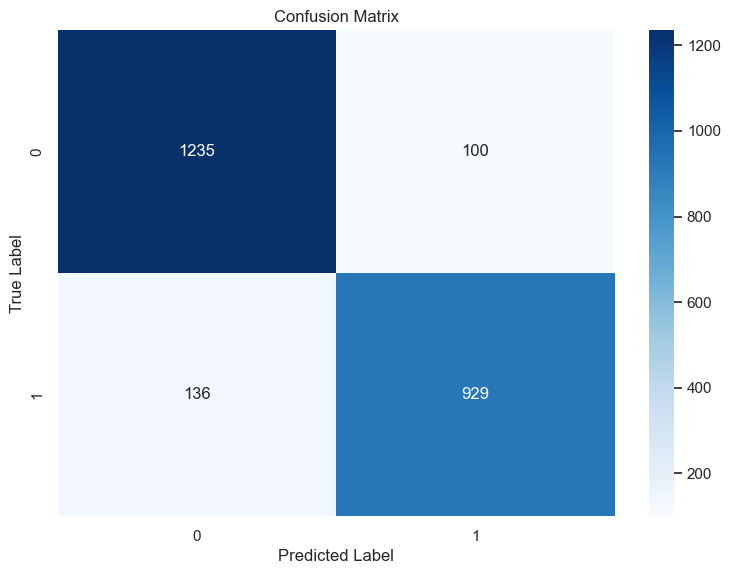

In [668]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [669]:
df_features1 = pd.DataFrame(model1.feature_importances_, columns = ['Importance'],
             index = X_train.columns).sort_values('Importance', ascending = False).reset_index()
df_features1.rename(columns = {'index':'Variable'}, inplace = True)
df_features1.head(10)

,Variable,Importance
0,share_food,0.091795
1,cook_fuel,0.088462
2,ea,0.068756
3,toilet,0.055623
4,exp_04,0.054050
5,exp_08,0.053732
6,exp_06,0.041271
7,exp_12,0.038916
8,water,0.035244
9,Industry,0.029779


Text(0.5, 1.0, 'Feature Importances')

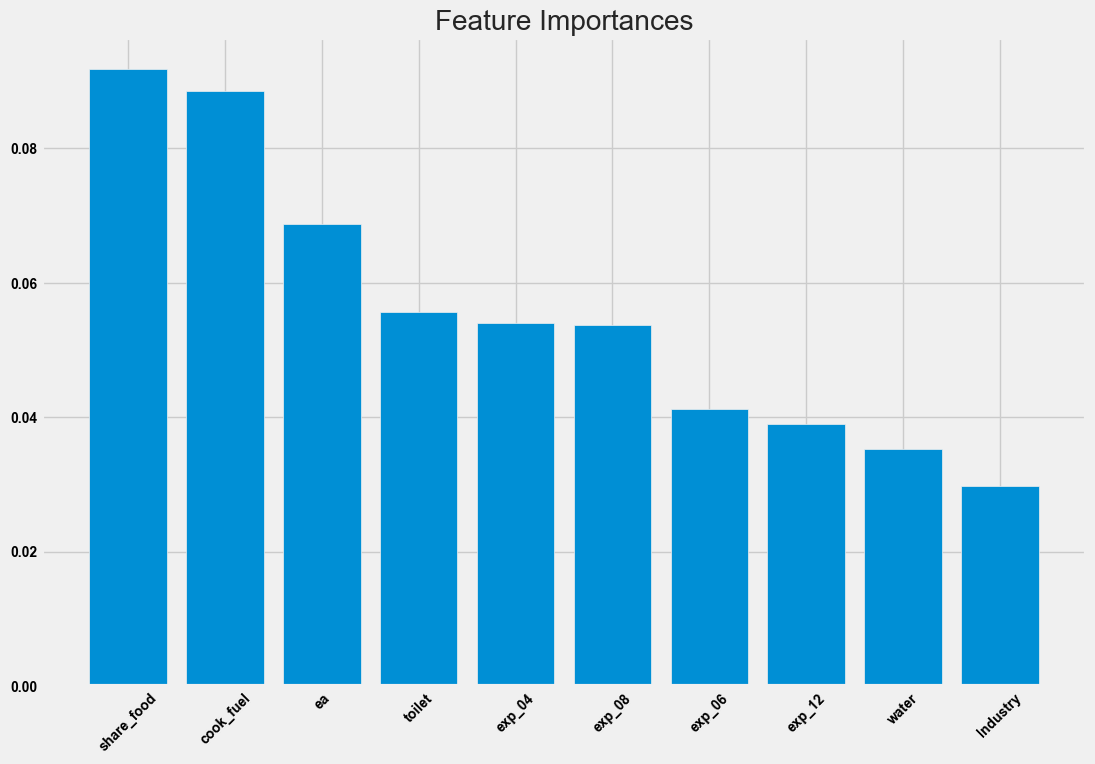

In [670]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.bar(x=df_features1.head(10)["Variable"],height=df_features1.head(10)["Importance"])
plt.xticks(rotation=45,fontsize=10,fontweight="bold",color="black")
plt.yticks(fontsize=10,fontweight="bold",color="black")
plt.title("Feature Importances")

 ### 2.2) Model 2

Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88


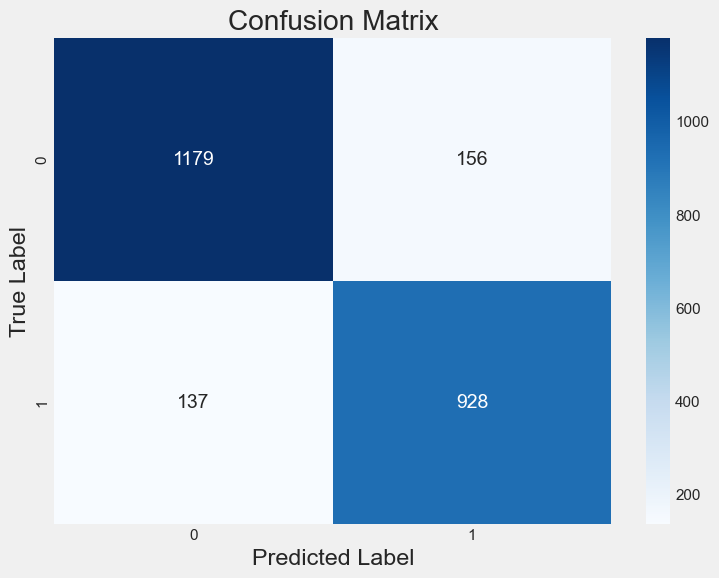

In [671]:
# Model Evaluation

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [672]:
df_features2 = pd.DataFrame(model2.feature_importances_, columns = ['Importance'],
             index = X_train.columns).sort_values('Importance', ascending = False).reset_index()
df_features2.rename(columns = {'index':'Variable'}, inplace = True)
df_features2

,Variable,Importance
0,cook_fuel,0.371216
1,ea,0.201960
2,hhweight,0.064417
3,toilet,0.047968
4,share_food,0.031649
5,exp_07,0.022626
6,exp_09,0.022512
7,exp_06,0.020851
8,exp_05,0.016360
9,exp_04,0.015765


Text(0.5, 1.0, 'Feature Importances')

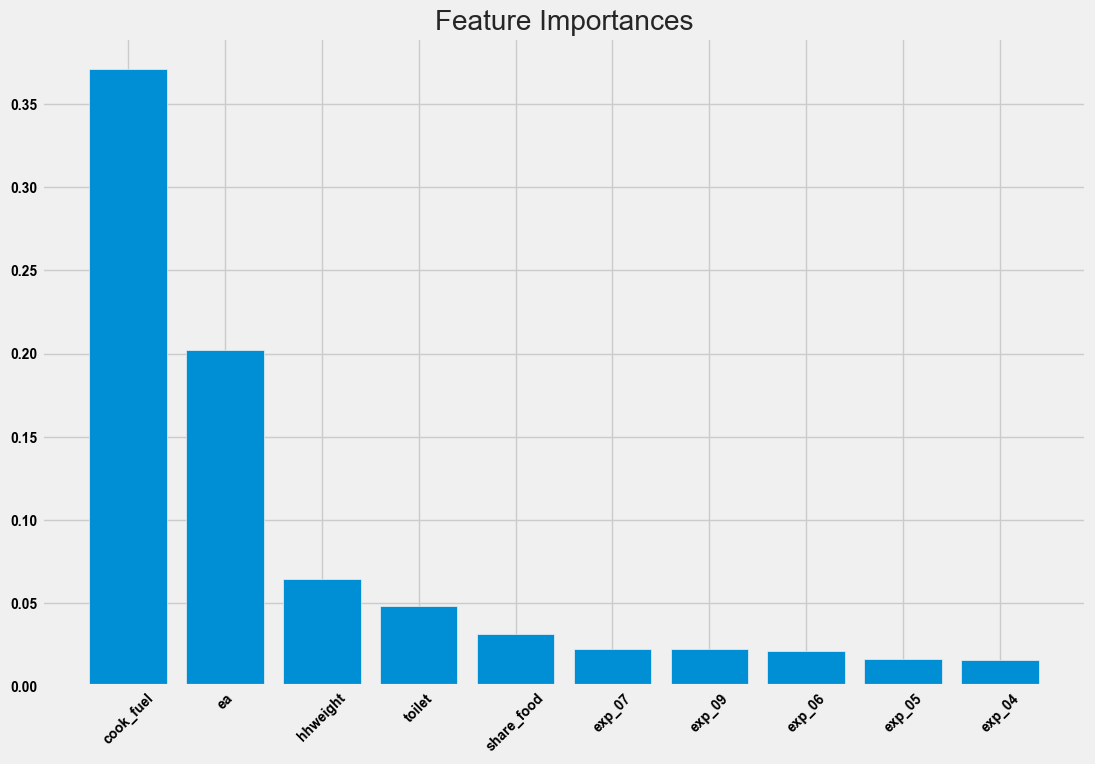

In [673]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.bar(x=df_features2.head(10)["Variable"],height=df_features2.head(10)["Importance"])
plt.xticks(rotation=45,fontsize=10,fontweight="bold",color="black")
plt.yticks(fontsize=10,fontweight="bold",color="black")
plt.title("Feature Importances")

## Save Model

In [674]:
model_file = 'finalized_model.pickle'
pickle.dump(model1, open(model_file, 'wb')) # model is your final model object.

variable_file = 'model_variables.pickle'
pickle.dump(df_features1, open(variable_file, 'wb')) # df_features is dataframe that holds final model variables.

In [675]:
# Write your test predictions to Mongo DB
collection = db["predictions"]
collection.delete_many({})
for i in range(len(X_test)):
    document = {  # Convert NumPy array to a Python list
        "actual_label": int(y_test.iloc[i]),
        "predicted_label": int(y_pred1[i])
    }
    # Insert the document into the collection
    collection.insert_one(document)



